In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('dht22_data.csv', dtype={'timestamp': 'str'})

In [18]:
df.head()

,20250814215733,38.40,26.50
0,20250814215749,39.6,26.5
1,20250814215804,41.3,26.5
2,20250814215819,38.7,26.6
3,20250814215834,38.4,26.6
4,20250814215849,39.8,26.6


In [19]:
HEADER = ["timestamp","humidity","temperature"]

In [20]:
df.columns = HEADER

In [8]:
print(df.head().to_markdown())

|    |   timestamp |   humidity |   temperature |
|---:|------------:|-----------:|--------------:|
|  0 | 2.02508e+13 |       39.6 |          26.5 |
|  1 | 2.02508e+13 |       41.3 |          26.5 |
|  2 | 2.02508e+13 |       38.7 |          26.6 |
|  3 | 2.02508e+13 |       38.4 |          26.6 |
|  4 | 2.02508e+13 |       39.8 |          26.6 |


In [21]:
df = df.replace({"": np.nan, "nan": np.nan, "None": np.nan})

In [22]:
df["humidity"] = pd.to_numeric(df["humidity"], errors="coerce")
df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
df = df.dropna(subset=["humidity","temperature"])

In [23]:
df["time"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H%M%S", errors="coerce")
df = df.dropna(subset=["time"]).sort_values("time").reset_index(drop=True)

In [24]:
df.head()

,timestamp,humidity,temperature,time
0,20250814215749,39.6,26.5,2025-08-14 21:57:49
1,20250814215804,41.3,26.5,2025-08-14 21:58:04
2,20250814215819,38.7,26.6,2025-08-14 21:58:19
3,20250814215834,38.4,26.6,2025-08-14 21:58:34
4,20250814215849,39.8,26.6,2025-08-14 21:58:49


In [27]:
df.tail()

,timestamp,humidity,temperature,time
5983,20250815225413,46.1,23.7,2025-08-15 22:54:13
5984,20250815225428,46.2,23.7,2025-08-15 22:54:28
5985,20250815225443,46.2,23.7,2025-08-15 22:54:43
5986,20250815225458,46.2,23.7,2025-08-15 22:54:58
5987,20250815225513,46.1,23.8,2025-08-15 22:55:13


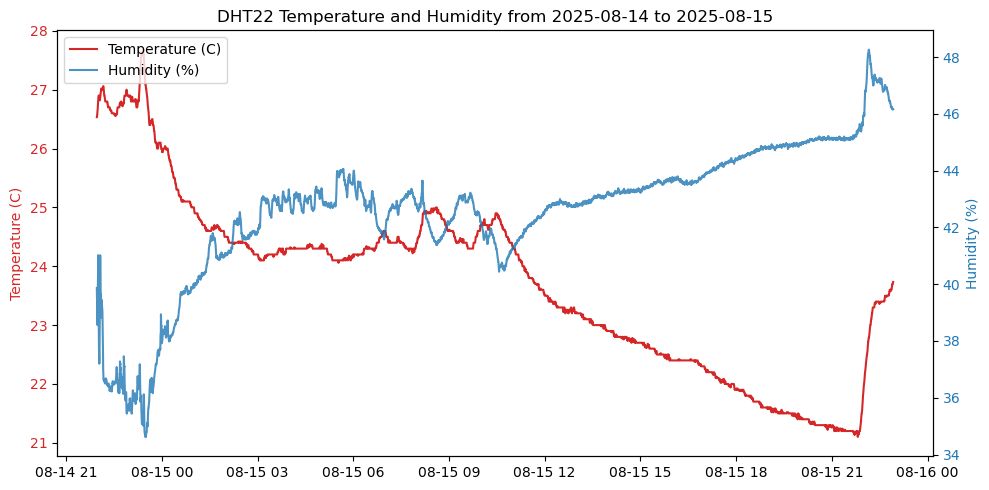

In [37]:
df["temp_smooth"] = df["temperature"].rolling(window=5, min_periods=1, center=True).mean()
df["hum_smooth"] = df["humidity"].rolling(window=5, min_periods=1, center=True).mean()


plt.figure(figsize=(10,5))
ax1 = plt.gca()
lns1 = ax1.plot(df["time"], df["temp_smooth"], color="tab:red", label="Temperature (C)")
ax1.set_ylabel("Temperature (C)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")

ax2 = ax1.twinx()
lns2 = ax2.plot(df["time"], df["hum_smooth"], color="tab:blue", alpha=0.8, label="Humidity (%)")
ax2.set_ylabel("Humidity (%)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")


lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper left")

plt.title("DHT22 Temperature and Humidity from " + df["time"].min().strftime("%Y-%m-%d") + " to " + df["time"].max().strftime("%Y-%m-%d"))
plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [39]:
print(df[['temp_smooth', 'hum_smooth']].describe().to_markdown())

|       |   temp_smooth |   hum_smooth |
|:------|--------------:|-------------:|
| count |    5988       |   5988       |
| mean  |      23.7024  |     42.5609  |
| std   |       1.49738 |      2.40611 |
| min   |      21.1     |     34.62    |
| 25%   |      22.46    |     41.78    |
| 50%   |      24.14    |     42.94    |
| 75%   |      24.5     |     43.78    |
| max   |      27.68    |     48.26    |
